# Orthogonal polynomial methods for non-periodic functions

We learned that smooth periodic functions and their derivatives can be well approximated by trigonometric interpolants:
$$
f(x) \approx p(x) =  \sum_{k=-(n-1)/2}^{(n-1)/2} \tilde{c}_k{\rm e}^{{\rm i}kx}
$$
and there are fast algorithms for mapping function values to coeffients and vice versa and for differentiation.

Here we'll learn that smooth non-periodic functions and their derivatives can be accurately and stably approximated by expansions in orthogonal polynomials (OPs),
$$
f(x) \approx \sum_{k = 0}^{n}  c_k p_k(x).
$$
and there are  fast algorithms for computing with OPs.

Suppose we want to approximate the function $f(x) = \frac{1}{1 + 25x^2}$ on $[-1, 1]$.  We know that a trigonometric interpolant will not converge very fast to $f$.  Instead we try to approximate $f$ with a Lagrange interpolating polynomial.  Recall from Lecture 1 that one representation of the unique polynomial $p(x)$ of degree $\leq n$ that interpolates $f$ at $x_0, \ldots, x_{n+1}$   ($p(x_j) = f(x_j)$, $j = 0, \ldots, n$) is as follows
$$
p(x) = \sum_{j = 0}^{n} \ell_j(x) f(x_j),
$$
where
$$
\ell_j(x) = \prod_{\substack{i = 0 \\ i \neq j}}^{n}\frac{x-x_i}{x_j - x_i}.
$$


First, we let the interpolation nodes $x_j$, $j  = 0, \ldots, n$ be equally spaced on the interval $[-1, 1]$.  Instead of using the formula for the Lagrange interpolating polynomial, we'll use ApproxFun.jl to construct the interpolant:

In [34]:
using ApproxFun, Plots

In [35]:
function equi_interp(f,n)
# Construct an interpolant of f at n+1 equispaced points on [-1, 1]
S = Chebyshev()
xk = range(-1,stop=1,length=n+1); # n equally spaced points
v = f.(xk);
V = Array{Float64}(undef,n+1,n+1); # Create a Vandermonde matrix by evaluating the basis at the grid
for k = 1:n+1
    V[:,k] = Fun(S,[zeros(k-1);1]).(xk)
end
pₙ = Fun(S,V\v)
pₙ
end;

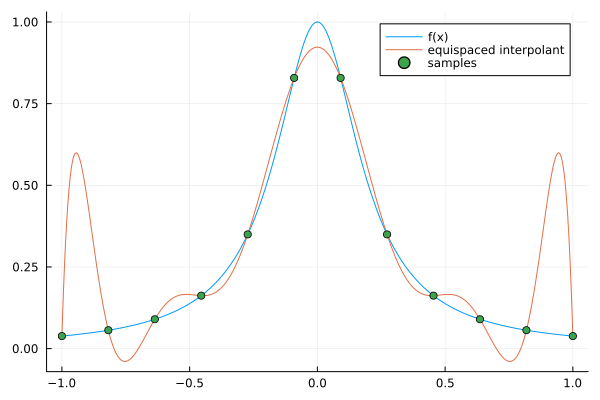

In [41]:
f = x -> 1/(25x^2 + 1)
n = 11
nodes = range(-1,stop=1,length=n+1)  
xx = range(-1,1;length=501)  # plotting grid
p = equi_interp(f,n) 
plot(xx,f.(xx);label="f(x)")
plot!(xx,p.(xx);label="equispaced interpolant")
scatter!(nodes,p.(nodes);label="samples")

The oscillations at the ends of the interval become larger as we increase $n$:

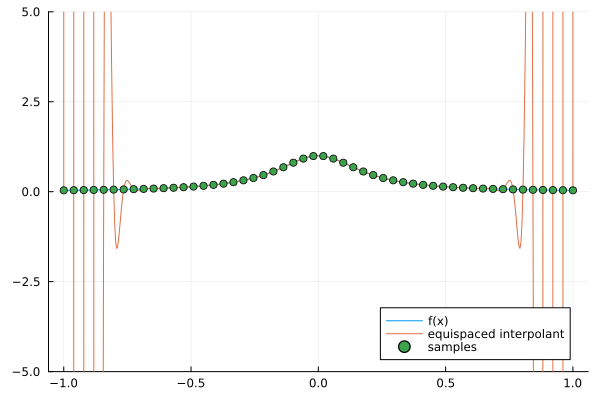

In [45]:
n = 51
nodes = range(-1,stop=1,length=n+1)  
xx = range(-1,1;length=501)  # plotting grid
p = equi_interp(f,n) 
plot(xx,f.(xx);label="f(x)",ylims=(-5,5))
plot!(xx,p.(xx);label="equispaced interpolant")
scatter!(nodes,p.(nodes);label="samples")

These oscillations of the interpolant through equally spaced nodes is known as the *Runge phenomenon*. Equally spaced interpolation nodes is clearly not a good choice for polynomial interpolation.  Maybe the oscillations at the endpoints can be suppressed if we choose nodes that clustered at the ends of the interval?

In [30]:
n = 3
V = Array{Float64}({Float64},n+1,n+1)

LoadError: syntax: { } vector syntax is discontinued around In[30]:2

In [21]:
nodes = rand(5,1)
xx = range(-1,1;length=11)
ℓf = x -> ℓ(x,1,nodes)
plot(xx,ℓf.(xx))

LoadError: ArgumentError: number of rows of each array must match (got (1, 3))

In [20]:
function ℓ(x,j,nodes)
    inds = [1:j j+2:length(nodes)]
    out = 0.0;
    for i = inds
        out .*= (x .- nodes[i])/(nodes[j+1]-nodes[i])
    end
    out
end

ℓ (generic function with 1 method)

1. Runge phenomenon
2. Chebyshev-Fourier connection
3. Orthogonal polynomials
4. Coefficient space and function value space
5. Boundary-value problems
6. Ultraspherical method, collocation method, finite difference method, Galerkin and finite element method
7. Vector spaces
8. Fourier-orthogonality connection

9. Instability of monomial basis